# Лабораторна робота 6
### Тимахова Ксенія КН-423а

In [125]:
N = ord("K") % 10 + 1
print(f"Варіант: {N}")

Варіант: 6


$$
\begin{cases}
-10.3x_1 + 10.2x_2 = 70 \\
4.7x_1 + 12.3x_2 = 173 \\
13.2x_1 + 8.8x_2 = 282 \\
\end{cases}
$$

### Короткий опис етапів виконання:
Було задано коефіцієнти трьох лінійних рівнянь виду. Створено функцію для обчислення.Задано діапазон значень для побудови графіків.
За допомогою *plt.subplots* створено три окремі осі для відображення кожної прямої. Побудовано графіки кожної прямої з власним *стилем* (колір і тип лінії). Додано назви осей, заголовки та сітку.
Збережено зображення графіків у форматах .jpg, .png, .svg та виведено на екран.

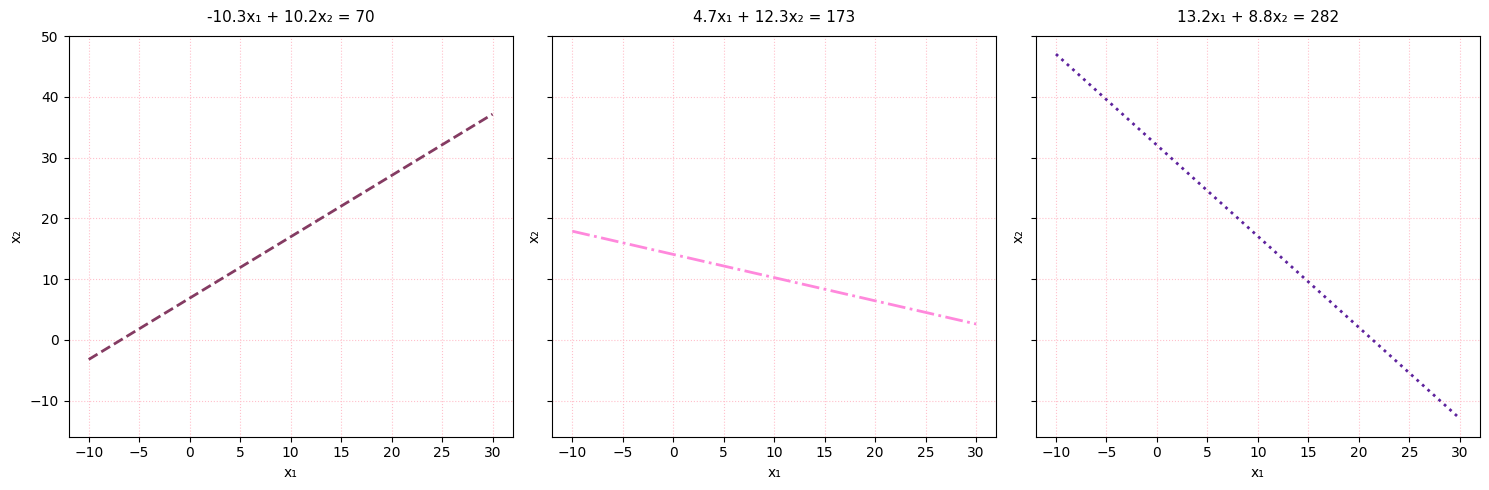

In [106]:
import matplotlib.pyplot as plt
import numpy as np
from math import atan2, degrees

lines = [
    {"a": -10.3, "b": 10.2, "c": 70,  "label": r"-10.3x₁ + 10.2x₂ = 70"},
    {"a": 4.7,   "b": 12.3, "c": 173, "label": r"4.7x₁ + 12.3x₂ = 173"},
    {"a": 13.2,  "b": 8.8,  "c": 282, "label": r"13.2x₁ + 8.8x₂ = 282"}]

colors = ["#843B62", "#FF88DC", "#5E239D"]
linestyles = ["--", "-.", ":"]

def func(x, line):
    return (line["c"] - line["a"] * x) / line["b"]

x = np.linspace(-10, 30, 400)

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

for i in range(len(axes)):
    ax = axes[i]
    ax.plot(x, func(x, lines[i]), color=colors[i], linestyle=linestyles[i], linewidth=2)
    ax.set_xlabel("x₁")
    ax.set_ylabel("x₂")
    ax.set_title(lines[i]['label'], fontsize=11, pad=10)
    ax.grid(linestyle=':', color='pink')

plt.tight_layout()

plt.savefig("lines.jpg")
plt.savefig("lines.png")
plt.savefig("lines.svg")
plt.show()

Для кожної пари рівнянь сформовано матриці коефіцієнтів і вектор вільних членів.
Методом **numpy.linalg.solve** знайдено точки перетину трьох прямих та виведено результати.
На одній координатній площині побудовано всі три прямі.
Кожну пряму підписано на графіку.
Позначено точки перетину та додано підписи до них.
Між точками перетину заповнено область.
Масштаб графіка підібрано так, щоб всі точки перетину були в області видимості.
Додано легенду, сітку, підписи осей та заголовок.
Збережено підсумковий графік у форматах .jpg, .png, .svg та виведено на екран.

Точка перетину 1-2: (5.17, 12.09)
Точка перетину 1-3: (10.03, 16.99)
Точка перетину 2-3: (16.08, 7.92)


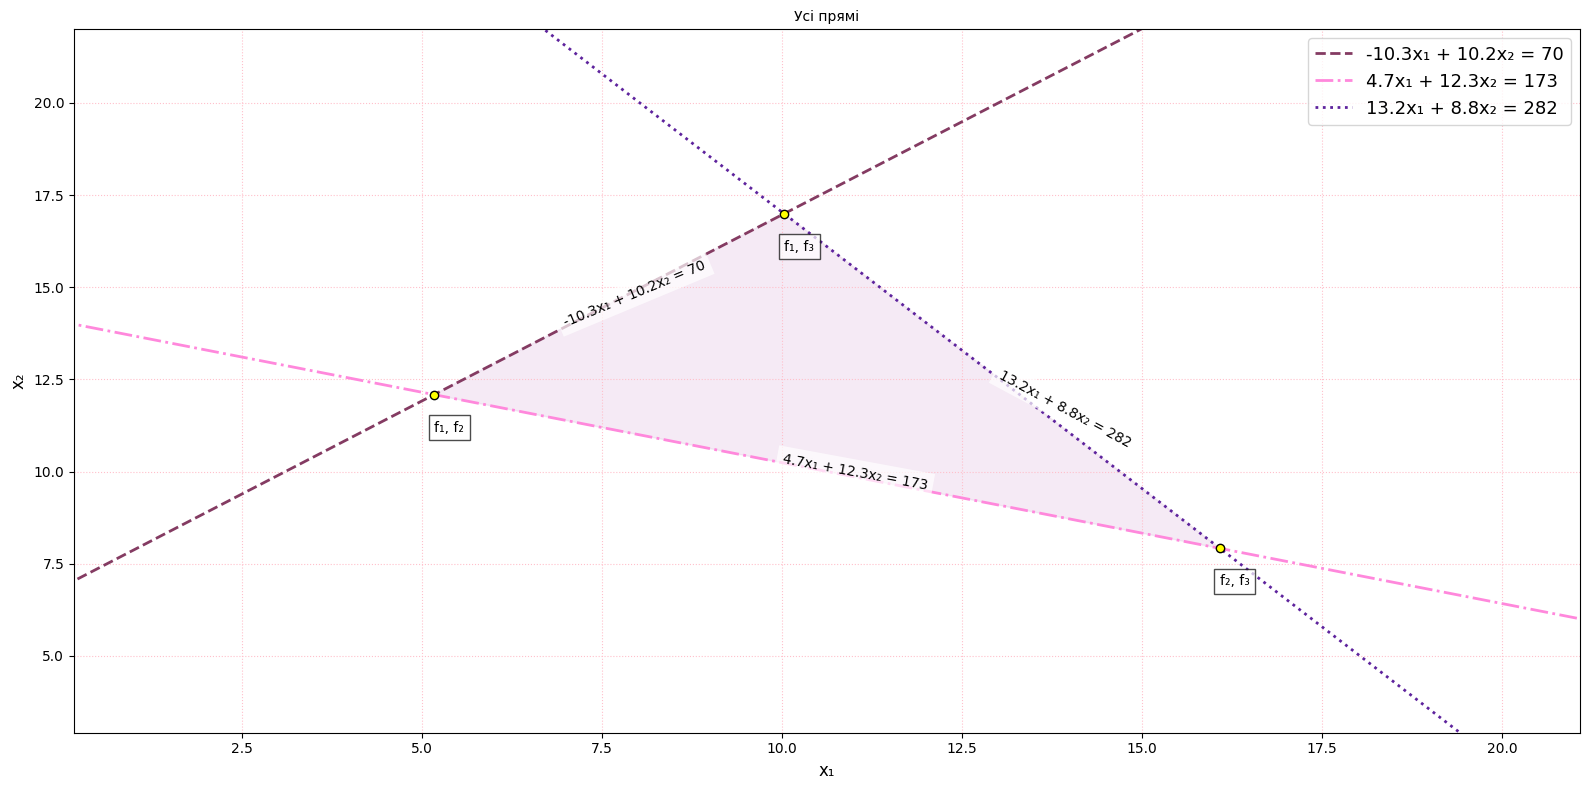

In [124]:
A1 = np.array([[-10.3, 10.2], [4.7, 12.3]])
B1 = np.array([70, 173])
intersection1 = np.linalg.solve(A1, B1)

A2 = np.array([[-10.3, 10.2], [13.2, 8.8]])
B2 = np.array([70, 282])
intersection2 = np.linalg.solve(A2, B2)

A3 = np.array([[4.7, 12.3], [13.2, 8.8]])
B3 = np.array([173, 282])
intersection3 = np.linalg.solve(A3, B3)

intersections = np.array([intersection1, intersection2, intersection3])

print(f"Точка перетину 1-2: ({intersection1[0]:.2f}, {intersection1[1]:.2f})")
print(f"Точка перетину 1-3: ({intersection2[0]:.2f}, {intersection2[1]:.2f})")
print(f"Точка перетину 2-3: ({intersection3[0]:.2f}, {intersection3[1]:.2f})")

fig2, ax = plt.subplots(figsize=(16, 8), dpi=100)

for i in range(len(lines)):
    line = lines[i]
    y = func(x, line)
    ax.plot(x, y, color=colors[i], linestyle=linestyles[i], linewidth=2, label=line["label"])
    angle = np.degrees(np.arctan2(-line["a"], line["b"])) * 0.5
    xm = 7 + i * 3
    ym = func(xm, line)
    ax.text(xm, ym, line["label"], rotation=angle, fontsize=10, 
            color='black', rotation_mode='anchor',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

intersection_labels = ["f₁, f₂", "f₁, f₃", "f₂, f₃"]

for j in range(len(intersections)):
    i = intersections[j]
    plt.plot(i[0], i[1], 'o', color='yellow', markeredgecolor='black')
    plt.text(i[0], i[1] - 1, f"{intersection_labels[j]}", fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

plt.fill(intersections[:, 0], intersections[:, 1], color="#E6CCE6", alpha=0.4)

plt.grid(color="pink", linestyle=":")
plt.legend(loc="upper right", fontsize=13)
plt.xlabel("x₁", fontsize=12)
plt.ylabel("x₂", fontsize=12)
plt.title("Усі прямі", fontsize=10)

padding = 5
plt.xlim(intersections[:, 0].min() - padding, intersections[:, 0].max() + padding)
plt.ylim(intersections[:, 1].min() - padding, intersections[:, 1].max() + padding)

plt.tight_layout()

plt.savefig("alllines.jpg")
plt.savefig("alllines.png")
plt.savefig("alllines.svg")
plt.show()

Було збережено графіки у форматах JPG, PNG та SVG. Формати продемонстрували суттєві відмінності. Зображення JPG і PNG зберігають інформацію у вигляді пікселів, проте JPG має артефакти поблизу ліній і тексту. PNG забезпечив високу чіткість без спотворень, але має більший розмір файлу. Формат SVG є векторним, тому не містить артефактів і дозволяє масштабувати зображення без втрати якості, при цьому його розмір виявився найменшим. Таким чином, PNG та SVG виявилися найбільш придатними, тоді як JPG може використовуватись лише для менш критичних візуалізацій, де можливі незначні втрати якості.

#### **Висновок**: У результаті виконання роботи отримано навички роботи з бібліотекою Matplotlib. Було побудовано графіки лінійних функцій, створено окремі графіки для кожної прямої та загальний. Також були знайдені точки перетину прямих і візуалізовано область, яку вони утворюють. Крім того, графіки були експортовані у різні формати файлів, що дозволило ознайомитися з особливостями формування графічних зображень та відмінностями кожного формату.